In [ ]:
from neuralnetlib.learners import IsolationForest, RandomForest, AdaBoost, GradientBoostingMachine, XGBoost, SVM
from neuralnetlib.utils import make_blobs

import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import make_classification
from matplotlib.colors import ListedColormap

## Isolation Forest

IsolationForest Predictions:
[ 1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1 -1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1 -1 -1 -1  1 -1 -1 -1 -1 -1 -1]


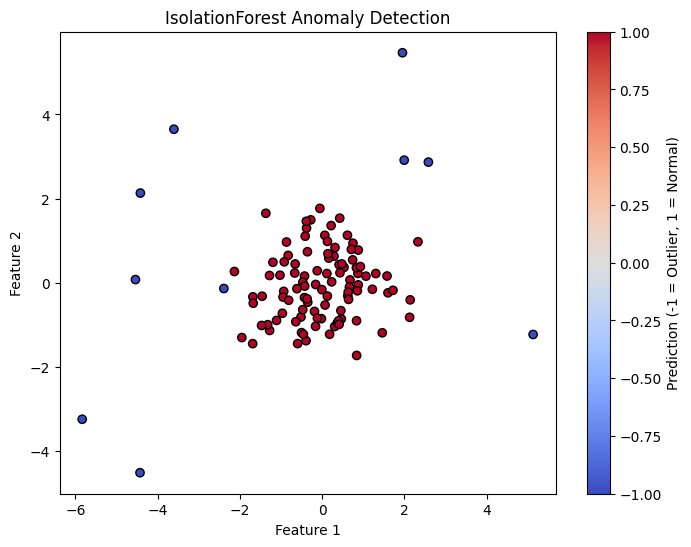

In [2]:
rng = np.random.default_rng(42)
normal_data = rng.normal(0, 1, size=(100, 2))  # Normal points
outliers = rng.uniform(-6, 6, size=(10, 2))    # Outlier points
data = np.vstack([normal_data, outliers])

isolation_forest = IsolationForest(n_estimators=10, max_samples=64, contamination=0.1, random_state=42)
isolation_forest.fit(data)

predictions = isolation_forest.predict(data)

print("IsolationForest Predictions:")
print(predictions)


plt.figure(figsize=(8, 6))
plt.scatter(data[:, 0], data[:, 1], c=predictions, cmap='coolwarm', edgecolor='k')
plt.title("IsolationForest Anomaly Detection")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.colorbar(label="Prediction (-1 = Outlier, 1 = Normal)")
plt.show()

## Random Forest

RandomForest (Regressor) Predictions:
[15.53242354  9.53558049 11.56699448 19.72986969  7.99723005 18.89729111
  1.06898738 16.42468286  4.35334197 14.02834295  7.30917596 11.78933576
  4.63536094  6.07251418  1.49074306  0.05800171 16.49051474 14.87029554
  2.45310292  2.30184626  2.80959715 16.49051474  3.79603257 10.67232066
 15.65911401  7.54587723  4.72376921 10.24142796  2.46492375 13.66148758
 11.20226703  4.63536094 17.86681265  2.46492375 11.20226703  7.30917596
 20.10894326  1.35805449 10.29117781  3.12590735  5.74494686 15.95930852
 19.94740148 11.91555241  2.39027737  2.16672483  4.35334197 11.87485744
 16.70000957  5.15929735 14.02834295  5.10046462  2.16672483  2.2341127
  7.65430267  4.94293001  2.41407169 17.08059598 11.88269207 12.00026412
 10.65501106  1.30341543 11.96101106  7.84444827 14.64919374 11.96101106
 13.78838592  2.46492375  7.81430195  6.07251418  2.53620868 11.88269207
  7.81430195 14.02834295 15.28032714  2.39027737  9.88708111 13.2643456
  1.99794304 11

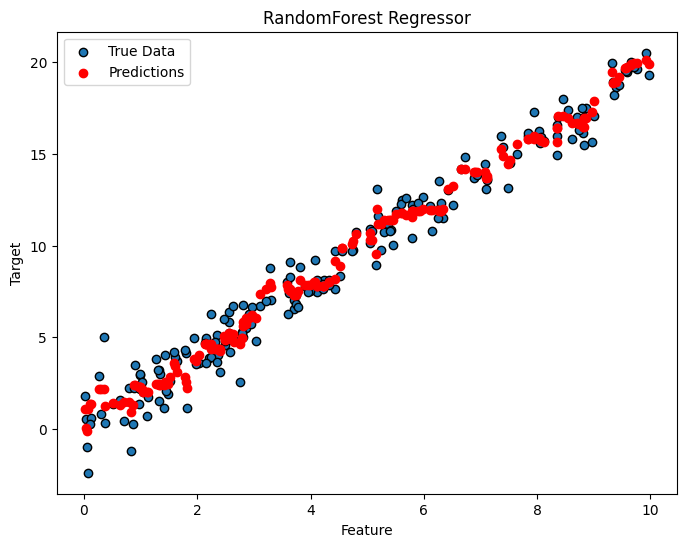

In [3]:
X = np.random.rand(200, 1) * 10
y = 2 * X.squeeze() + np.random.normal(0, 1, size=200)

random_forest_reg = RandomForest(
    n_estimators=10,
    tree_type="regressor",
    max_depth=5,
    bootstrap=True,
    random_state=42
)
random_forest_reg.fit(X, y)

predictions = random_forest_reg.predict(X)

print("RandomForest (Regressor) Predictions:")
print(predictions)

plt.figure(figsize=(8, 6))
plt.scatter(X, y, label="True Data", edgecolor="k")
plt.scatter(X, predictions, color="r", label="Predictions")
plt.title("RandomForest Regressor")
plt.xlabel("Feature")
plt.ylabel("Target")
plt.legend()
plt.show()

## AdaBoost

AdaBoost Predictions:
[-1.  1.  1.  1.  1. -1.  1. -1. -1. -1. -1. -1.  1. -1.  1.  1.  1. -1.
  1.  1.  1. -1.  1.  1. -1. -1.  1.  1. -1.  1.  1.  1. -1.  1.  1. -1.
 -1. -1. -1.  1. -1.  1. -1.  1. -1. -1. -1.  1.  1. -1.  1. -1. -1.  1.
  1. -1. -1. -1.  1.  1. -1. -1.  1. -1. -1. -1. -1. -1.  1. -1. -1. -1.
  1.  1. -1. -1. -1.  1.  1. -1.  1. -1.  1.  1. -1.  1.  1. -1. -1. -1.
 -1.  1. -1. -1.  1. -1.  1.  1.  1. -1. -1. -1. -1. -1. -1. -1. -1.  1.
  1.  1.  1.  1.  1. -1.  1.  1.  1. -1. -1. -1.  1. -1. -1. -1.  1.  1.
 -1. -1.  1. -1. -1.  1.  1.  1.  1.  1. -1. -1. -1. -1. -1. -1.  1. -1.
  1. -1. -1.  1.  1.  1.  1.  1. -1.  1.  1. -1. -1. -1.  1. -1. -1.  1.
 -1.  1.  1.  1. -1.  1.  1.  1. -1.  1.  1. -1. -1.  1. -1.  1. -1.  1.
  1.  1. -1.  1.  1.  1. -1. -1. -1.  1.  1.  1. -1. -1.  1. -1. -1. -1.
  1.  1.]


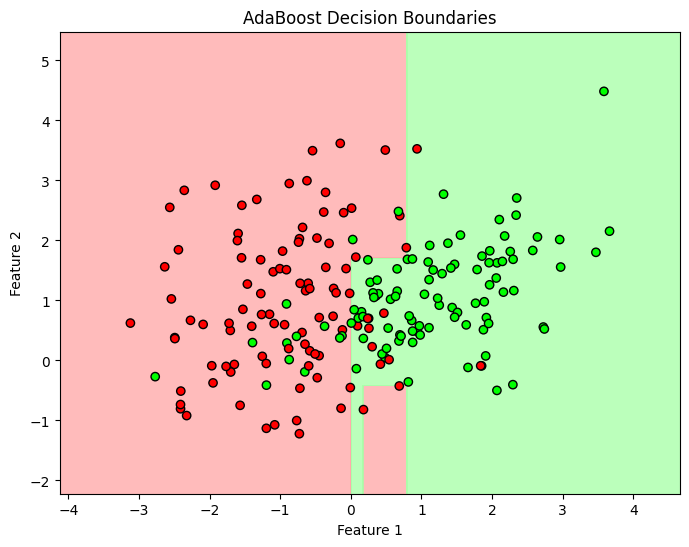

In [4]:
X, y = make_classification(
    n_samples=200,
    n_features=2,
    n_classes=2,
    n_clusters_per_class=1,
    n_informative=2,
    n_redundant=0,
    random_state=42
)

adaboost = AdaBoost(n_estimators=10, random_state=42)
adaboost.fit(X, y)

predictions = adaboost.predict(X)

print("AdaBoost Predictions:")
print(predictions)

x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))
Z = adaboost.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, Z, alpha=0.8, cmap=ListedColormap(["#FFAAAA", "#AAFFAA"]))
plt.scatter(X[:, 0], X[:, 1], c=y, edgecolor="k", cmap=ListedColormap(["#FF0000", "#00FF00"]))
plt.title("AdaBoost Decision Boundaries")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

## Gradient Boosting Machine

### Regression

GradientBoostingMachine (Regression) Predictions:
[11.21044751  4.80166961 16.09522479 17.70747859 16.45967798  3.98479221
 17.70747859  3.98479221 13.42257209 15.88065252 13.68889087  7.91831098
  4.826037   11.93957851 14.77714637 14.22534603  5.05898165 13.10000446
  1.18491318  9.96511455 12.90721813 18.66475266  2.37730619 16.82711551
 13.36669688 14.82275015  7.43533371 20.29560642  9.96511455 14.22534603
  9.37597897 11.61722596  5.88803378 19.09958099 14.39520538 14.77714637
  9.37597897  0.57485105 13.10000446  3.33601444  9.50063417 11.59392203
  2.54284525  4.34260398 13.42257209 18.14453722  4.19063088 17.74729685
  2.56138213  8.84769916 18.73153933  8.22339654 11.14073908  4.00467626
  3.33601444 14.57885611  7.43533371  1.15928636 15.44826736  7.5388938
 10.36320698 17.65555847  3.31601688 11.59392203 15.04421334  6.96731868
  3.71066348 18.06592446 13.10000446 18.37174866  5.05898165 19.70427248
 17.70747859  0.4785123  17.58797022  2.25149772 18.06592446  9.02464718
  

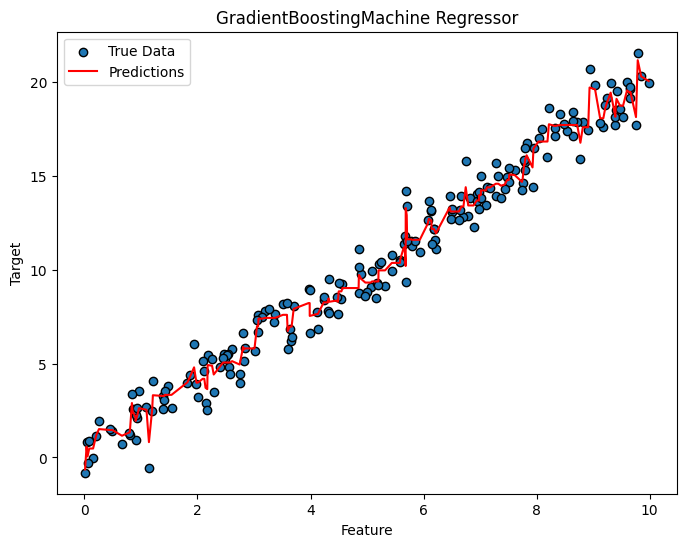

In [5]:
X = np.random.rand(200, 1) * 10
y = 2 * X.squeeze() + np.random.normal(0, 1, size=200)

gbm_reg = GradientBoostingMachine(task="regression", n_estimators=100, learning_rate=0.1, max_depth=3)
gbm_reg.fit(X, y)

predictions = gbm_reg.predict(X)

print("GradientBoostingMachine (Regression) Predictions:")
print(predictions)

plt.figure(figsize=(8, 6))
plt.scatter(X, y, label="True Data", edgecolor="k")
plt.plot(np.sort(X, axis=0), predictions[np.argsort(X, axis=0)], color="r", label="Predictions")
plt.title("GradientBoostingMachine Regressor")
plt.xlabel("Feature")
plt.ylabel("Target")
plt.legend()
plt.show()

### Binary classification

GradientBoostingMachine (Binary Classification) Predictions:
[0 1 1 1 1 0 1 0 0 0 0 0 1 0 1 1 1 0 1 1 1 0 1 1 0 0 1 1 0 1 1 1 0 1 1 0 0
 0 0 1 0 0 0 1 0 0 0 0 1 0 1 0 0 1 1 0 0 0 1 1 0 0 1 0 0 0 0 0 1 0 0 0 1 1
 0 0 1 1 1 0 1 0 1 1 0 1 1 0 0 0 0 1 1 0 1 0 1 1 1 0 0 0 0 0 0 0 0 1 1 0 1
 1 1 0 1 1 1 0 1 0 1 1 0 0 1 1 0 0 1 0 0 1 1 1 1 1 0 0 0 0 0 0 1 0 1 0 0 1
 1 1 1 1 0 1 1 0 1 0 1 0 0 1 0 1 1 1 0 1 1 1 0 1 1 1 0 1 1 1 1 1 1 1 0 1 1
 1 0 0 0 1 1 1 0 0 1 0 0 0 1 0]


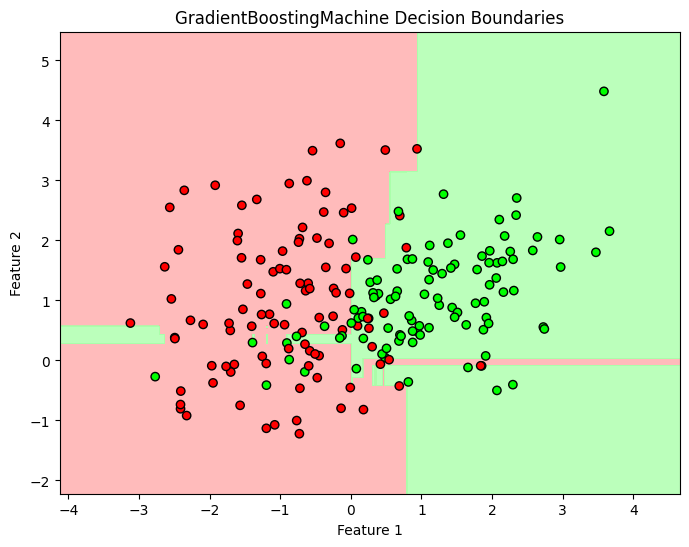

In [6]:
X, y = make_classification(
    n_samples=200,
    n_features=2,
    n_classes=2,
    n_clusters_per_class=1,
    n_informative=2,
    n_redundant=0,
    random_state=42
)

gbm_clf = GradientBoostingMachine(task="binary_classification", n_estimators=100, learning_rate=0.1, max_depth=3)
gbm_clf.fit(X, y)

predictions = gbm_clf.predict(X)

print("GradientBoostingMachine (Binary Classification) Predictions:")
print(predictions)

x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))
Z = gbm_clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, Z, alpha=0.8, cmap=ListedColormap(["#FFAAAA", "#AAFFAA"]))
plt.scatter(X[:, 0], X[:, 1], c=y, edgecolor="k", cmap=ListedColormap(["#FF0000", "#00FF00"]))
plt.title("GradientBoostingMachine Decision Boundaries")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

## XGBoost

### Regression

XGBoost (Regression) Predictions:
[ 3.92740217e+00  1.76308789e+01  5.97900520e+00  7.71828784e+00
  1.88574832e+01  1.85365801e+01  1.19598945e+01  1.28880895e+01
  1.97586310e+01  1.08898996e+01  3.76185652e+00  1.49944700e+01
  1.82293712e+00  3.69337367e+00  1.93894666e+01  7.58163821e+00
  7.24110708e+00  6.71189287e+00  1.74903192e+01  1.31001651e+01
  1.74903192e+01  2.66615766e+00  1.47200304e+01  1.85365801e+01
  1.72257653e+00  1.47697142e+01  1.48384129e+01  1.08548818e+01
  1.50308370e+01  3.69337367e+00  1.46597461e+01  1.37747699e+01
  1.95653983e+01  5.26620405e+00  1.91277587e+01  7.58163821e+00
  8.97065644e+00  1.77381411e+01  1.70094864e+01  1.67614802e+01
  1.19572034e+01  7.40714416e+00  8.97065644e+00  1.98880768e+01
  1.40807275e+01  2.66615766e+00  7.40714416e+00  1.33994886e+01
  7.14726748e+00  1.44550725e+00  1.33994886e+01  3.92740217e+00
  8.38669005e+00  1.67614802e+01  5.16531200e+00  1.28880895e+01
  1.47877019e+01  5.75522401e+00 -1.36337697e+00  1.9127

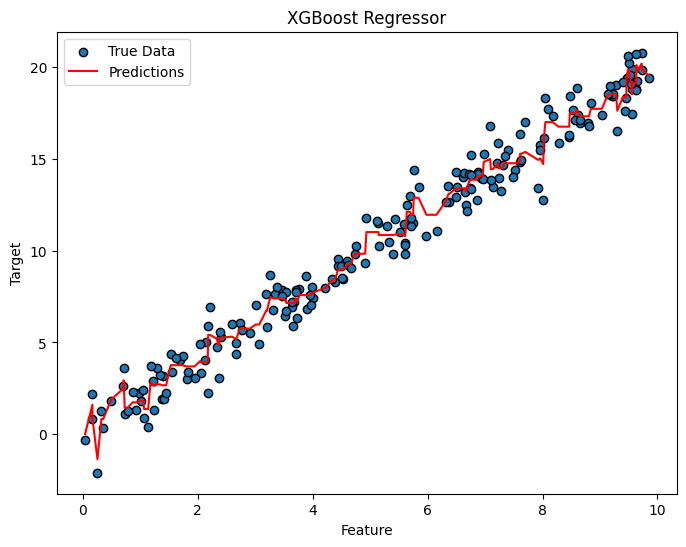

In [3]:
X = np.random.rand(200, 1) * 10
y = 2 * X.squeeze() + np.random.normal(0, 1, size=200)

xgboost_reg = XGBoost(
    objective="reg:squarederror", 
    n_estimators=100, 
    learning_rate=0.1, 
    max_depth=3, 
    random_state=42
)
xgboost_reg.fit(X, y)

predictions = xgboost_reg.predict(X)

print("XGBoost (Regression) Predictions:")
print(predictions)

plt.figure(figsize=(8, 6))
plt.scatter(X, y, label="True Data", edgecolor="k")
plt.plot(np.sort(X, axis=0), predictions[np.argsort(X, axis=0)], color="r", label="Predictions")
plt.title("XGBoost Regressor")
plt.xlabel("Feature")
plt.ylabel("Target")
plt.legend()
plt.show()

### Binary classification

XGBoost (Binary Classification) Predictions:
[0 1 1 1 1 0 1 0 0 0 0 0 1 0 1 1 1 0 1 1 1 0 1 1 0 1 1 1 0 1 0 1 0 1 1 0 0
 0 0 1 0 0 0 1 0 0 0 0 1 0 1 0 0 1 1 0 0 0 1 1 0 0 1 0 0 0 0 0 1 0 0 0 1 1
 0 0 1 1 1 0 1 0 1 1 0 0 1 0 0 0 0 1 1 0 1 0 1 1 1 0 0 0 0 0 0 0 0 1 1 1 1
 1 1 0 1 1 1 0 1 0 1 1 0 0 1 0 0 0 1 0 0 1 1 1 1 1 0 0 0 0 0 0 1 0 1 0 0 1
 1 1 1 1 0 1 1 0 1 0 1 0 0 0 0 1 1 1 0 1 1 1 0 1 1 0 0 1 0 1 0 1 1 1 0 1 1
 1 0 0 0 1 1 1 0 0 1 0 0 0 1 0]


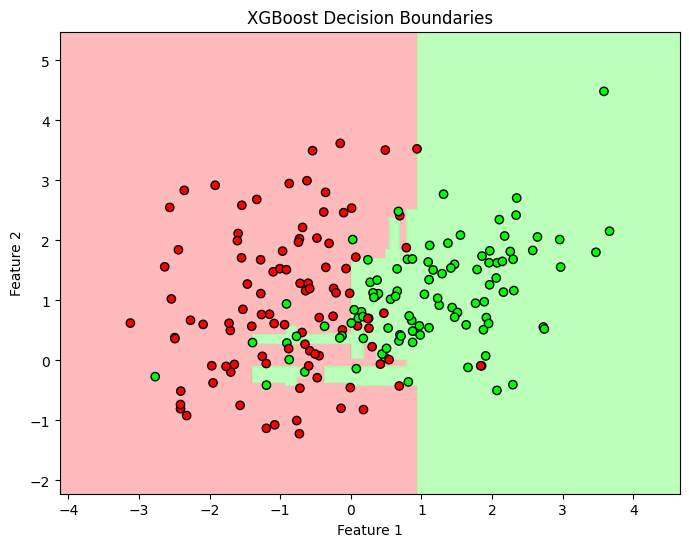

In [4]:
X, y = make_classification(
    n_samples=200,
    n_features=2,
    n_classes=2,
    n_clusters_per_class=1,
    n_informative=2,
    n_redundant=0,
    random_state=42
)

xgboost_clf = XGBoost(
    objective="binary:logistic", 
    n_estimators=100, 
    learning_rate=0.1, 
    max_depth=3, 
    random_state=42
)
xgboost_clf.fit(X, y)

predictions = xgboost_clf.predict(X)

print("XGBoost (Binary Classification) Predictions:")
print(predictions)

x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))
Z = xgboost_clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, Z, alpha=0.8, cmap=ListedColormap(["#FFAAAA", "#AAFFAA"]))
plt.scatter(X[:, 0], X[:, 1], c=y, edgecolor="k", cmap=ListedColormap(["#FF0000", "#00FF00"]))
plt.title("XGBoost Decision Boundaries")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

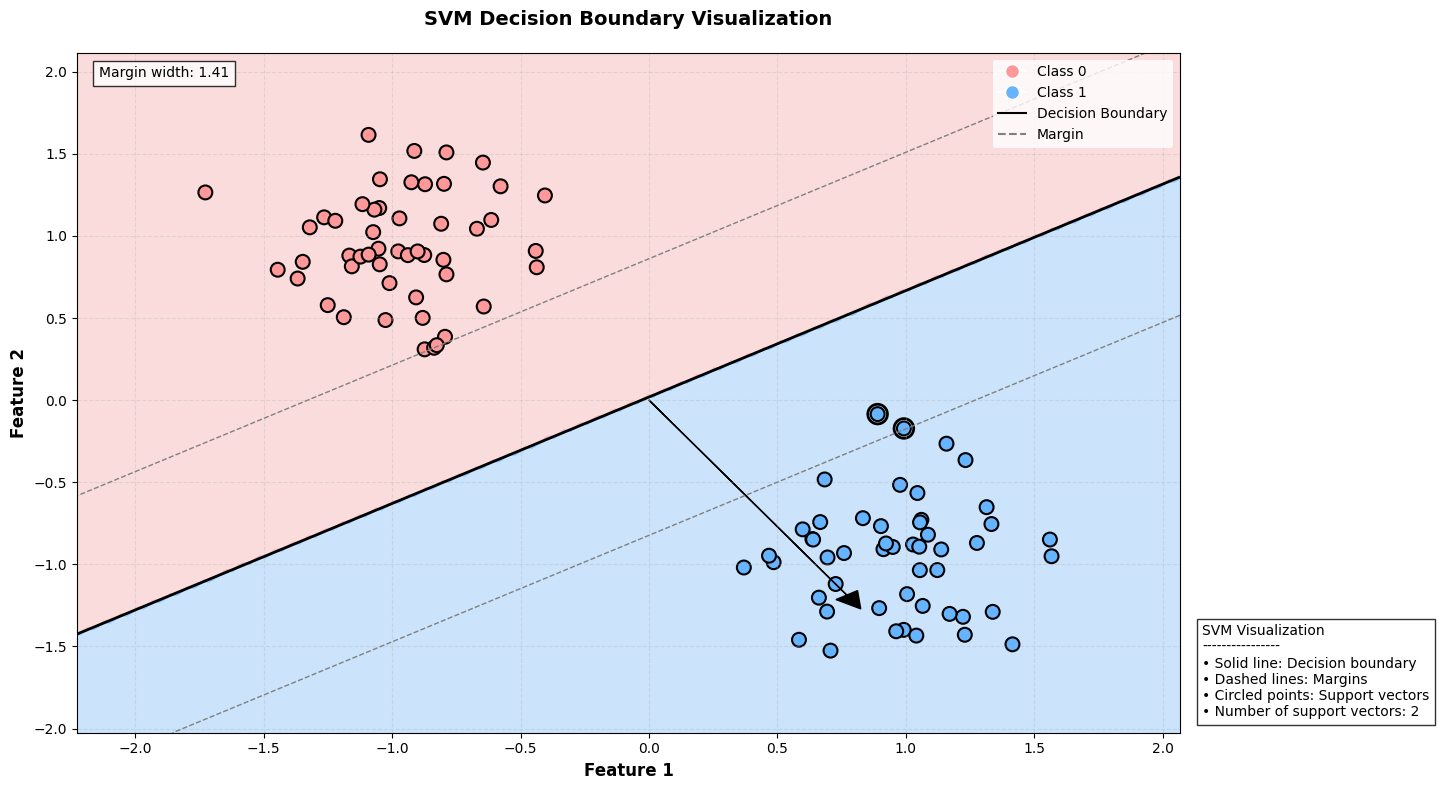

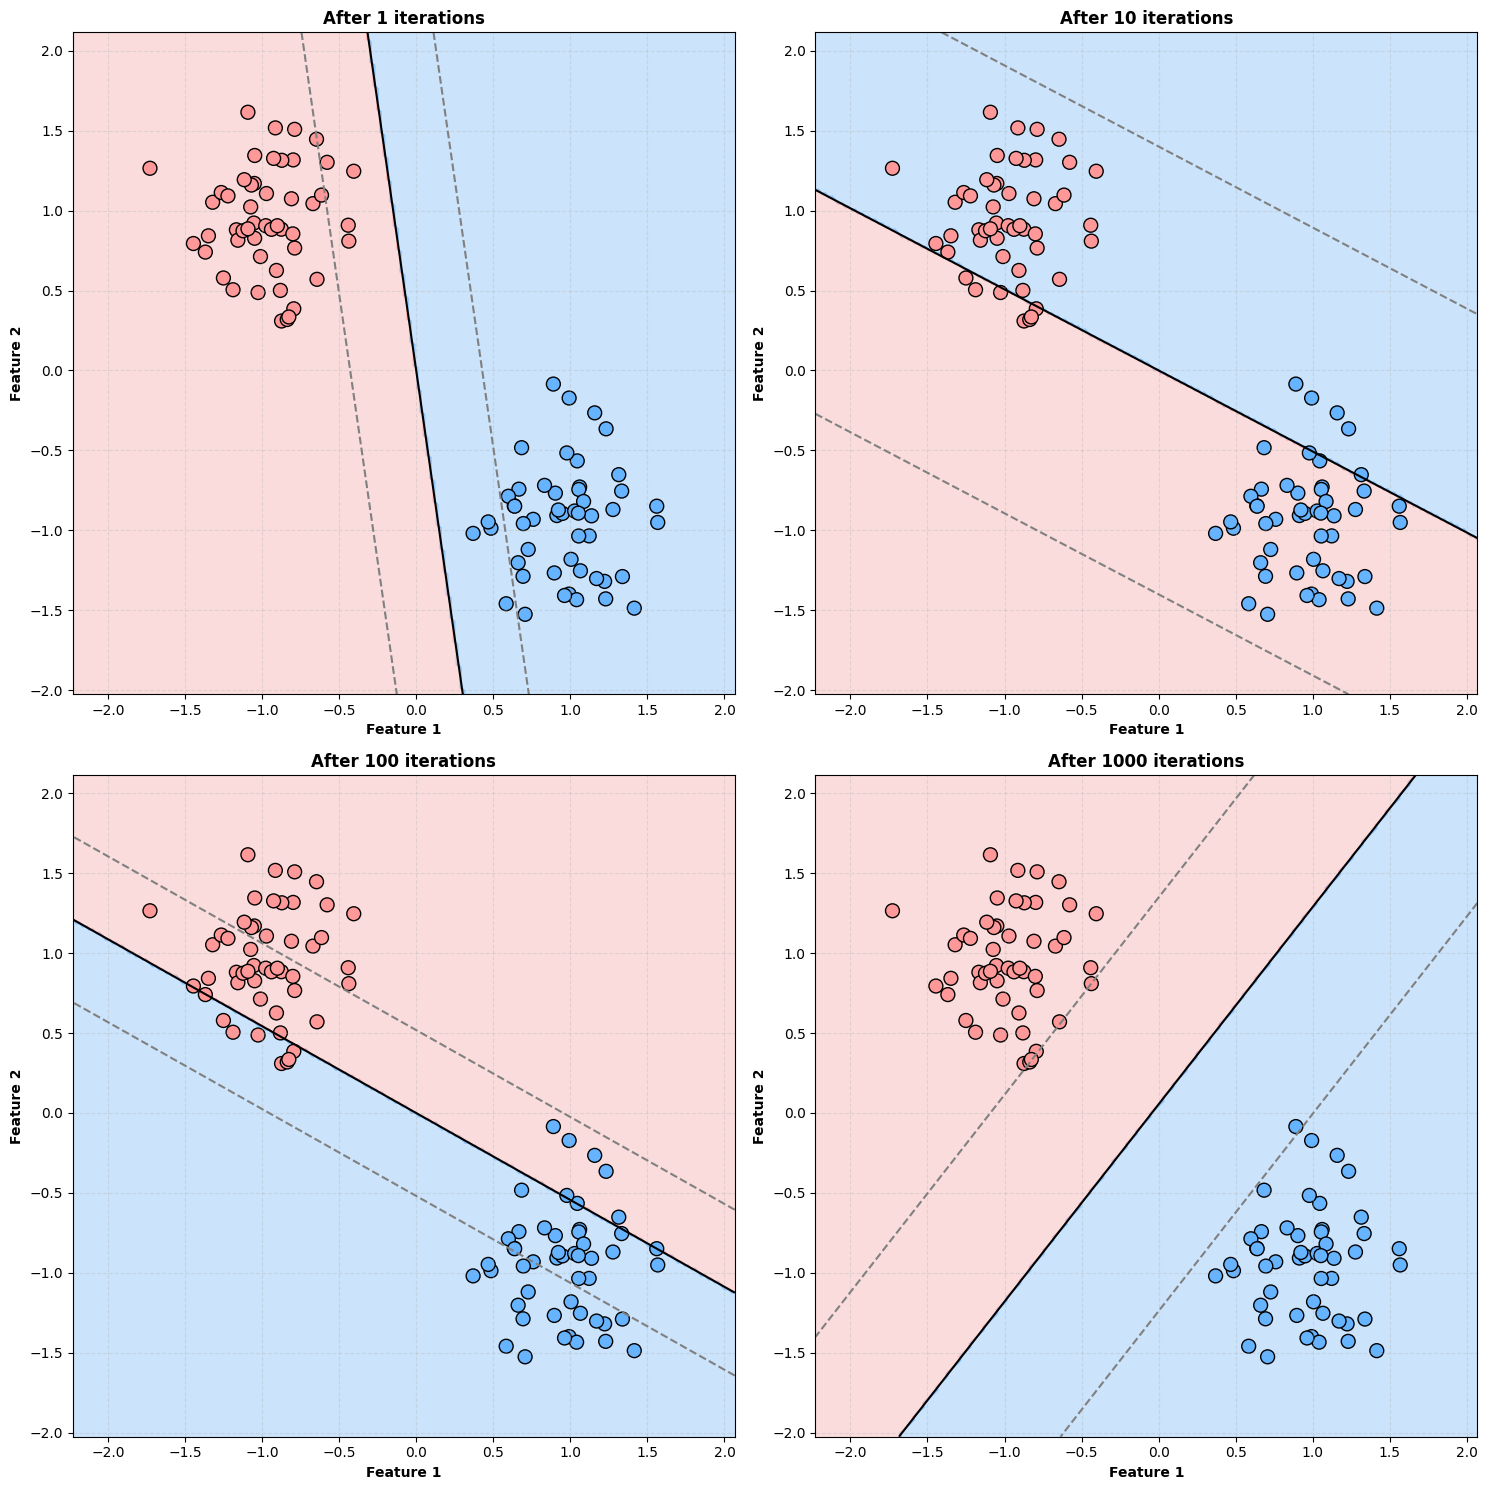

In [3]:
def visualize_svm():
    np.random.seed(42)
    
    X, y = make_blobs(n_samples=100, centers=2, n_features=2, 
                      random_state=42, cluster_std=1.2)
    
    X = (X - X.mean(axis=0)) / X.std(axis=0)
    
    svm = SVM(learning_rate=0.01, lambda_param=0.01, n_iters=1000)
    svm.fit(X, y)
    
    x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
    y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 200),
                        np.linspace(y_min, y_max, 200))
    
    Z = svm.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    scores = svm.decision_function(np.c_[xx.ravel(), yy.ravel()])
    scores = scores.reshape(xx.shape)
    
    plt.style.use('default')
    fig, ax = plt.subplots(figsize=(12, 8), facecolor='white')
    ax.set_facecolor('#f8f9fa')
    
    custom_cmap = ListedColormap(['#ff9999', '#66b3ff'])
    
    ax.contourf(xx, yy, Z, alpha=0.3, cmap=custom_cmap)
    
    ax.contour(xx, yy, scores, levels=[0], colors='k', linestyles='-', linewidths=2)
    ax.contour(xx, yy, scores, levels=[-1, 1], colors='gray', linestyles='--', linewidths=1)
    
    scatter = ax.scatter(X[:, 0], X[:, 1], c=y, cmap=custom_cmap, 
                        s=100, edgecolor='black', linewidth=1.5)
    
    margin_points = np.abs(svm.decision_function(X)) <= 1.0
    ax.scatter(X[margin_points, 0], X[margin_points, 1], 
              s=200, facecolors='none', edgecolor='k', linewidth=2,
              label='Support Vectors')
    
    w = svm.w
    margin_width = 2 / np.sqrt(np.sum(w ** 2))
    ax.arrow(0, 0, w[0], w[1], head_width=0.1, head_length=0.1, fc='k', ec='k')
    
    ax.set_xlabel('Feature 1', fontsize=12, fontweight='bold')
    ax.set_ylabel('Feature 2', fontsize=12, fontweight='bold')
    ax.set_title('SVM Decision Boundary Visualization', fontsize=14, 
                 fontweight='bold', pad=20)
    
    legend_elements = [
        plt.Line2D([0], [0], marker='o', color='w', 
                   markerfacecolor='#ff9999', markersize=10,
                   label='Class 0'),
        plt.Line2D([0], [0], marker='o', color='w', 
                   markerfacecolor='#66b3ff', markersize=10,
                   label='Class 1'),
        plt.Line2D([0], [0], color='k', linestyle='-',
                   label='Decision Boundary'),
        plt.Line2D([0], [0], color='gray', linestyle='--',
                   label='Margin')
    ]
    ax.legend(handles=legend_elements, loc='upper right', fontsize=10, 
             facecolor='white', edgecolor='none')
    
    plt.text(0.02, 0.98, f'Margin width: {margin_width:.2f}', 
             transform=ax.transAxes, fontsize=10,
             verticalalignment='top', bbox=dict(facecolor='white', alpha=0.8))
    
    plt.tight_layout()
    
    ax.grid(True, linestyle='--', alpha=0.3)
    
    info_text = (
        'SVM Visualization\n'
        '----------------\n'
        '• Solid line: Decision boundary\n'
        '• Dashed lines: Margins\n'
        '• Circled points: Support vectors\n'
        f'• Number of support vectors: {np.sum(margin_points)}'
    )
    plt.text(1.02, 0.02, info_text, transform=ax.transAxes, fontsize=10,
             verticalalignment='bottom', bbox=dict(facecolor='white', alpha=0.8))
    
    plt.show()

def visualize_svm_training():
    np.random.seed(42)
    
    X, y = make_blobs(n_samples=100, centers=2, n_features=2, 
                      random_state=42, cluster_std=1.2)
    X = (X - X.mean(axis=0)) / X.std(axis=0)
    
    n_steps = 4
    iterations = [1, 10, 100, 1000]
    
    plt.style.use('default')
    fig, axes = plt.subplots(2, 2, figsize=(15, 15), facecolor='white')
    axes = axes.ravel()
    
    x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
    y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 200),
                        np.linspace(y_min, y_max, 200))
    
    custom_cmap = ListedColormap(['#ff9999', '#66b3ff'])
    
    for idx, n_iter in enumerate(iterations):
        svm = SVM(learning_rate=0.01, lambda_param=0.01, n_iters=n_iter)
        svm.fit(X, y)
        
        axes[idx].set_facecolor('#f8f9fa')
        
        Z = svm.predict(np.c_[xx.ravel(), yy.ravel()])
        Z = Z.reshape(xx.shape)
        
        scores = svm.decision_function(np.c_[xx.ravel(), yy.ravel()])
        scores = scores.reshape(xx.shape)
        
        axes[idx].contourf(xx, yy, Z, alpha=0.3, cmap=custom_cmap)
        axes[idx].contour(xx, yy, scores, levels=[0], colors='k', linestyles='-')
        axes[idx].contour(xx, yy, scores, levels=[-1, 1], colors='gray', linestyles='--')
        axes[idx].scatter(X[:, 0], X[:, 1], c=y, cmap=custom_cmap, 
                         s=100, edgecolor='black')
        
        axes[idx].set_title(f'After {n_iter} iterations', fontsize=12, fontweight='bold')
        axes[idx].set_xlabel('Feature 1', fontweight='bold')
        axes[idx].set_ylabel('Feature 2', fontweight='bold')
        axes[idx].grid(True, linestyle='--', alpha=0.3)
    
    plt.tight_layout()
    plt.show()

visualize_svm()
visualize_svm_training()